<a href="https://colab.research.google.com/github/kipronopato/Google-Earth-Engine-Projects/blob/main/Nakuru_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd


from google.colab import files
import geopandas as gpd
import io
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as colors

In [119]:

from google.colab import files

uploaded = files.upload()

Saving Nakuru.zip to Nakuru (1).zip


   OBJECTID serial_no   sub_county      ward location reg_sectio local_name  \
0         1      None  Nakuru East  Flamingo  Bondeni     Nakuru       None   
1         3      None  Nakuru East  Flamingo  Bondeni     Nakuru       None   
2         4      None  Nakuru East  Flamingo  Bondeni     Nakuru       None   
3         5      None  Nakuru East  Flamingo  Bondeni     Nakuru       None   
4         6      None  Nakuru East  Flamingo  Bondeni     Nakuru       None   

  sheet_no block_no  area_ha  ...  zone status           source date_acqui  \
0     None  Block 1      0.0  ...  None   None  Survey of Kenya 2025-04-28   
1     None  Block 1      0.0  ...  None   None  Survey of Kenya 2025-04-28   
2     None  Block 1      0.0  ...  None   None  Survey of Kenya 2025-04-28   
3     None  Block 1      0.0  ...  None   None  Survey of Kenya 2025-04-28   
4     None  Block 1      0.0  ...  None   None  Survey of Kenya 2025-04-28   

  sub_locati                        comments plot_no   S

<Axes: >

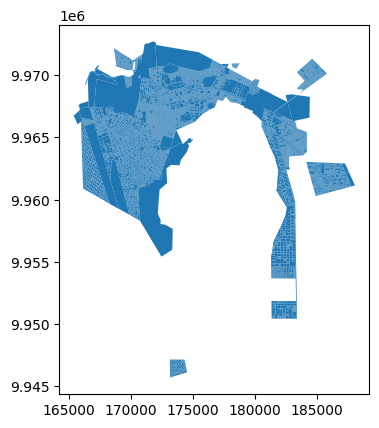

In [120]:


filename = next(iter(uploaded))  # Get uploaded filename
gdf = gpd.read_file(io.BytesIO(uploaded[filename]))

# View your data
print(gdf.head())
gdf.plot()




In [121]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 43536 entries, 0 to 43535
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    43536 non-null  int64         
 1   serial_no   1133 non-null   object        
 2   sub_county  42826 non-null  object        
 3   ward        42826 non-null  object        
 4   location    42828 non-null  object        
 5   reg_sectio  42802 non-null  object        
 6   local_name  1133 non-null   object        
 7   sheet_no    28567 non-null  object        
 8   block_no    41612 non-null  object        
 9   area_ha     43536 non-null  float64       
 10  owner       1132 non-null   object        
 11  value       1132 non-null   object        
 12  descriptio  38974 non-null  object        
 13  tenure      1132 non-null   object        
 14  land_use    1134 non-null   object        
 15  zone        1132 non-null   object        
 16  status      11

In [122]:
gdf.isnull().sum()


,0
OBJECTID,0
serial_no,42403
sub_county,710
ward,710
location,708
reg_sectio,734
local_name,42403
sheet_no,14969
block_no,1924
area_ha,0


In [115]:
# Get unique value counts per column
unique_counts = gdf.nunique()

print("Number of unique values per column:")
unique_counts


Number of unique values per column:


,0
OBJECTID,43536
serial_no,2
sub_county,7
ward,22
location,15
reg_sectio,29
local_name,2
sheet_no,53
block_no,35
area_ha,1


In [123]:
Sub_county = gdf['sub_county'].value_counts().reset_index()
Sub_county.columns = ['sub_county', 'parcel_count']
Sub_county

,sub_county,parcel_count
0,Nakuru West,17699
1,Nakuru East,14192
2,Gilgil,4588
3,Nakuru North,3833
4,Rongai,1630
5,Njoro,838
6,<Null>,46


In [124]:

import altair as alt
# Create a bar chart with 'sub_county' on the x-axis and 'parcel_count' on the y-axis.
# Use different colors for each 'sub_county' bar.
chart = alt.Chart(Sub_county).mark_bar().encode(
    x='sub_county',
    y='parcel_count',
    color='sub_county'  # Encode color by 'sub_county'
)
# Display the chart
chart

alt.Chart(...)

In [127]:
ward_counts = gdf['ward'].value_counts().reset_index()
ward_counts.columns = ['ward', 'parcel_count']
ward_counts



,ward,parcel_count
0,Nakuru East,6111
1,Mbaruk/Eburu,4587
2,Kaptembwo,4228
3,Kapkures,3906
4,Barut,3760
5,Lanet/umoja,3494
6,London,3216
7,Menengai,2940
8,Biashara,2818
9,Shabaab,1671


In [140]:

ward_counts = gdf['ward'].value_counts().reset_index()
ward_counts.columns = ['ward', 'parcel_count']

ward_subcounty_mapping = gdf[['ward', 'sub_county']].drop_duplicates()
ward_counts_with_subcounty = ward_counts.merge(ward_subcounty_mapping, on='ward', how='left')
ward_counts_sorted = ward_counts_with_subcounty.sort_values(by='sub_county')


chart = alt.Chart(ward_counts_sorted).mark_bar().encode(
    x=alt.X('ward', sort=alt.EncodingSortField(field='sub_county', order='ascending')),
    y='parcel_count',
    color='sub_county',
    tooltip=['ward', 'parcel_count', 'sub_county']
).properties(
    title='Parcel Count by Ward, Grouped by Sub-County'
)
chart

alt.Chart(...)

In [110]:
roads_count = (gdf['plot_no']== 'Road').sum()
print(f"Number of parcels with 'Road' in the 'plot_no' column: {roads_count}")

Number of parcels with 'Road' in the 'plot_no' column: 1013


In [105]:
registration_section = gdf['reg_sectio'].value_counts().reset_index()
registration_section.columns = ['reg_sectio', 'parcel_count']
registration_section





,reg_sectio,parcel_count
0,Nakuru,11217
1,Nakuru Municipality,4285
2,Dundori/Lanet (New Gakoe),3511
3,Miti Mingi/Mbaruk (Baruti),2580
4,Miti Mingi/ Mbaruk (Barut),2543
5,Miti Mingi/Mbaruk (Kiungururia),2341
6,Nakuru Municipality ( Ronda),2268
7,Nakuru Municipality (Kipsigis Tugen),1826
8,Njoro Ngata (New Kiambu),1600
9,Miti Mingi/ Mbaruk (Kianjoya D),1414


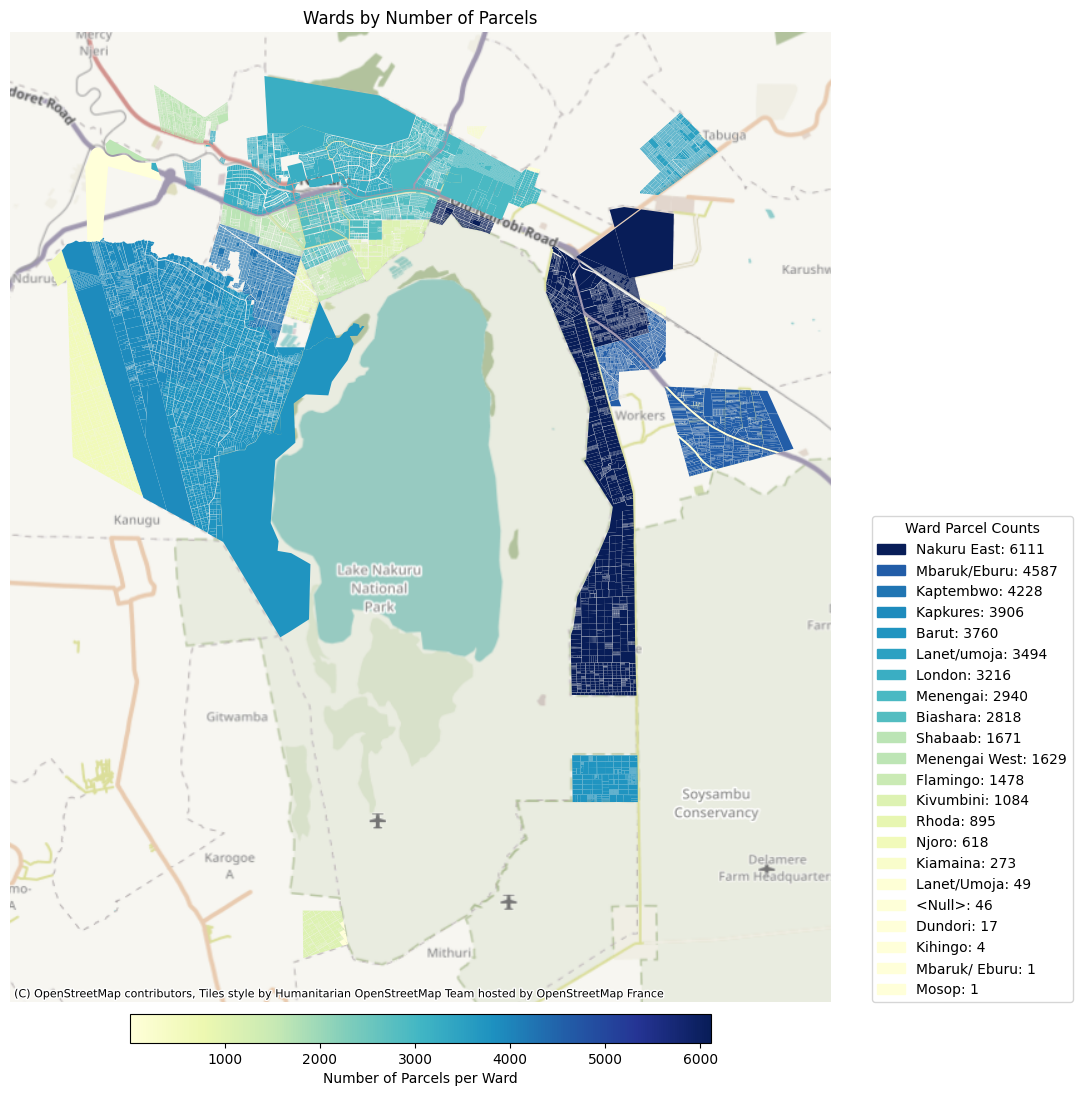

In [147]:
filename = next(iter(uploaded))  # Get uploaded filename
gdf = gpd.read_file(io.BytesIO(uploaded[filename]))

# Assume there's a 'ward' column and we want to count parcels per ward
if 'ward' not in gdf.columns:
    print("Error: 'ward' column not found in the GeoDataFrame.")
else:
    # Count parcels per ward
    ward_counts = gdf['ward'].value_counts().reset_index()
    ward_counts.columns = ['ward', 'parcel_count']

    # Merge counts back to the original geodataframe to plot
    gdf_with_counts = gdf.merge(ward_counts, on='ward')

    fig, ax = plt.subplots(1, 1, figsize=(15, 15))

    gdf_with_counts.plot(
    column='parcel_count',
    ax=ax,
    legend=True,
    cmap='YlGnBu',  # Optional: better color scheme
    legend_kwds={
        'label': "Number of Parcels per Ward",
        'orientation': "horizontal",
        'shrink': 0.5,
        'pad': 0.01
    }
)


    ctx.add_basemap(ax, crs=gdf.crs.to_epsg())

    ax.set_title('Wards by Number of Parcels')
    ax.set_axis_off()


# Normalize and create color map
norm = colors.Normalize(vmin=gdf_with_counts['parcel_count'].min(),
                        vmax=gdf_with_counts['parcel_count'].max())
cmap = plt.cm.YlGnBu

# Generate custom legend patches
legend_patches = []
for ward, count in ward_counts.values:
    color = cmap(norm(count))
    patch = mpatches.Patch(color=color, label=f"{ward}: {count}")
    legend_patches.append(patch)

# Add custom legend to the plot
ax.legend(handles=legend_patches, title="Ward Parcel Counts",
          loc='lower left', bbox_to_anchor=(1.05, 0), borderaxespad=0.)


plt.show()